# Задание 5. Обучение без учителя

0. Применить другую модель, подходящую для кластеризации нелинейного примера.
1. Кластеризовать свой датасет любой моделью
2. Визуализировать результаты кластеризации:
спроецировать датасет на плоскость с помощью TSNE
раскрасить кластеры

In [52]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, DBSCAN

In [53]:
hippos = pd.DataFrame(multivariate_normal([1500, 1.3], [300**2, .1**2], seed=1).rvs(100),
                    columns=['weight', 'height'])
giraffes = pd.DataFrame(multivariate_normal([1000, 5], [200**2, .1**2], seed=1).rvs(100),
                    columns=['weight', 'height'])
elephants = pd.DataFrame(multivariate_normal([4500, 3.4], [1000**2, .1**2], seed=1).rvs(100),
                         columns=['weight', 'height'])
hippos['class'] = 'hippo'
giraffes['class'] = 'giraffe'
elephants['class'] = 'elephant'
animals = pd.concat([hippos, giraffes, elephants])

In [54]:
animals['distance'] = animals.height * 10
animals['direction'] = np.random.rand(len(animals)) * 2*np.pi
animals['x'] = animals.distance * np.cos(animals.direction)
animals['y'] = animals.distance * np.sin(animals.direction)
animals.sample(5)

,weight,height,class,distance,direction,x,y
86,1505.665141,4.975137,giraffe,49.751365,6.147792,49.296055,-6.715453
99,5310.951673,3.504444,elephant,35.044442,5.694265,29.140883,-19.465916
55,3126.882680,3.431516,elephant,34.315159,5.404996,21.911807,-26.408387
42,1559.489916,1.311901,hippo,13.119009,5.844859,11.878782,-5.568026
78,972.711051,4.988095,giraffe,49.880946,0.927109,29.935993,39.899187


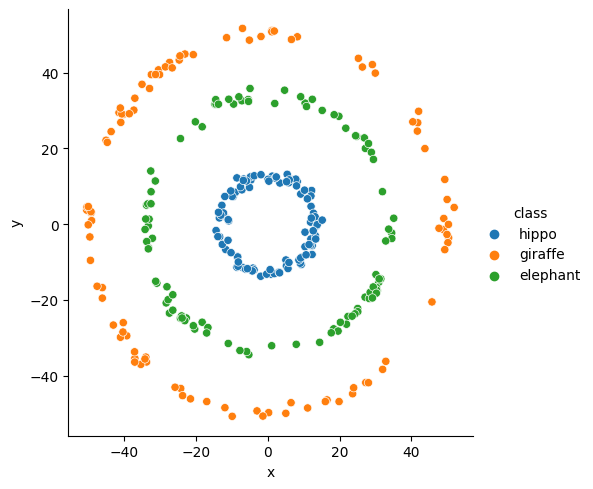

In [55]:
sns.relplot(x='x', y='y', hue='class', data=animals)

## K-means (семинар)

In [56]:
from sklearn.cluster import KMeans

In [57]:
model = KMeans(3)
model.fit(animals[['x', 'y']])
model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

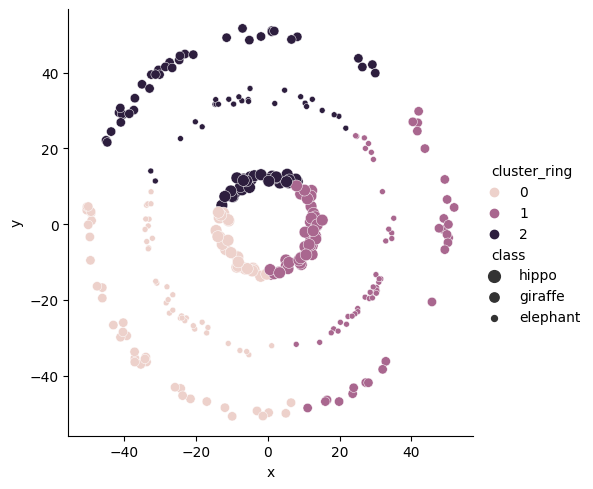

In [58]:
animals['cluster_ring'] = model.labels_
sns.relplot(x='x', y='y', hue='cluster_ring', size='class', data=animals)

## Spectral Clustering

In [64]:
from sklearn.cluster import SpectralClustering

In [65]:
model = SpectralClustering(3)
model.fit(animals[['x', 'y']])
model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(


SpectralClustering(n_clusters=3)

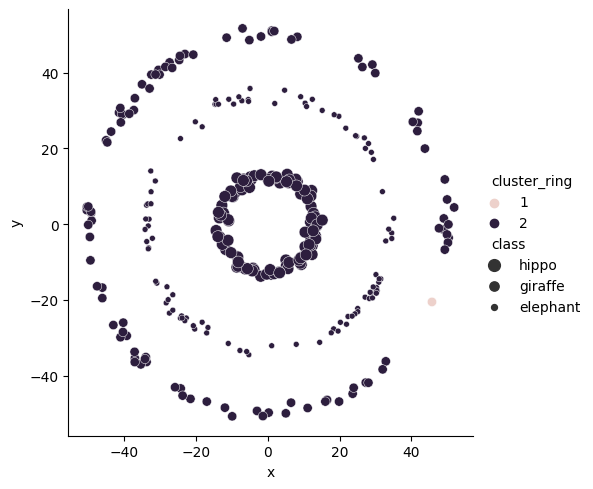

In [66]:
animals['cluster_ring'] = model.labels_
sns.relplot(x='x', y='y', hue='cluster_ring', size='class', data=animals)

## Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

In [67]:
from sklearn.cluster import DBSCAN

In [68]:
model = DBSCAN(3)
model.fit(animals[['x', 'y']])
model

DBSCAN(eps=3)

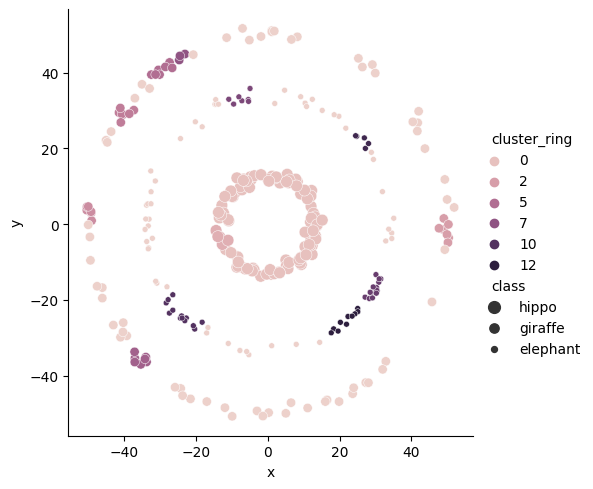

In [69]:
animals['cluster_ring'] = model.labels_
sns.relplot(x='x', y='y', hue='cluster_ring', size='class', data=animals)

# Кластеризовать свой датасет любой моделью

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [70]:
! pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d mssmartypants/rice-type-classification

! unzip rice-type-classification.zip

Saving kaggle.json to kaggle.json
100% 888k/888k [00:00<00:00, 1.34MB/s]
100% 888k/888k [00:00<00:00, 1.34MB/s]
Archive:  rice-type-classification.zip
  inflating: riceClassification.csv  


In [97]:
df = pd.read_csv('riceClassification.csv')
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [98]:
from sklearn.preprocessing import LabelEncoder

L=LabelEncoder()
df["Class"]=L.fit_transform(df["Class"])
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [99]:
# Препроцессинг, пайплайн
nkm = Pipeline([('prep', StandardScaler()), ('clusterer', KMeans(2))])
nkm.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('prep', StandardScaler()),
                ('clusterer', KMeans(n_clusters=2))])

Визуализировать результаты кластеризации:

In [100]:
from sklearn.manifold import TSNE
df_ = pd.DataFrame(TSNE(n_components=2).fit_transform(nkm['prep'].transform(df)))
df_['cluster']=nkm['clusterer'].labels_

In [101]:
df_.head()

,0,1,cluster
0,45.917915,85.212440,1
1,48.079494,86.080345,1
2,47.812458,86.032730,1
3,47.738491,85.989723,1
4,47.358318,85.675911,1


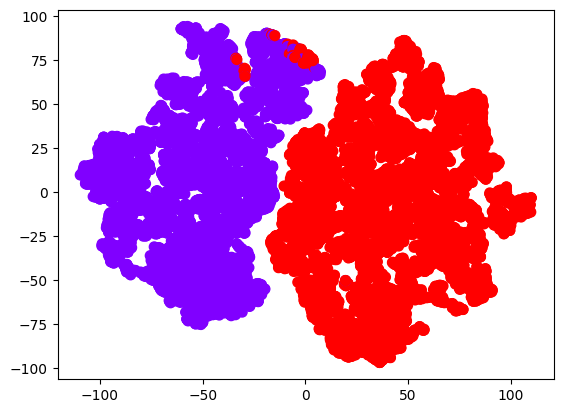

In [103]:
plt.scatter(df_[0], df_[1], c=df_["cluster"], cmap='rainbow', s = 50)
plt.show()